# Lab 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm


#this sets the size of the plot to something useful
#plt.rcParams["figure.figsize"] = (20,15)

## Problem 1

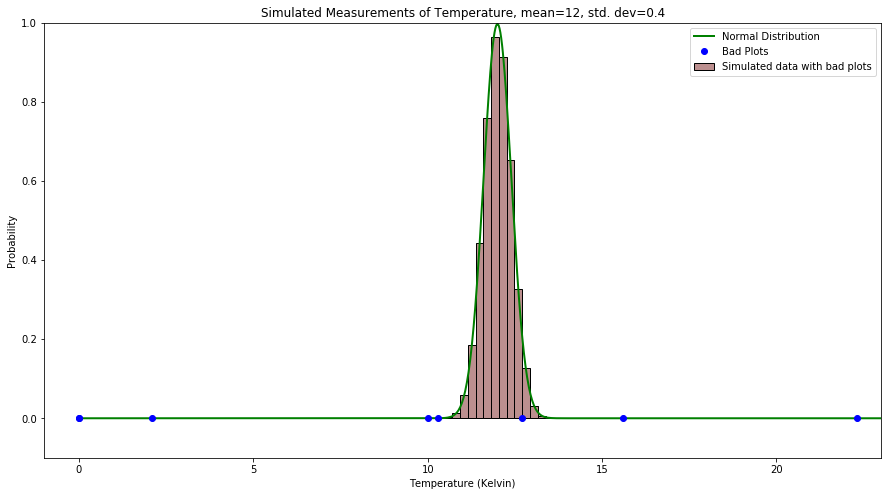

In [2]:
#Part A

"""We create a randomly normally distributed dataset and insert our
   bad data points into our dataset. Then we plot our dataset as a histogram,
   with a normal distribution curve."""

goodData = norm.rvs(loc=12, scale=0.4, size=100000)
badData = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
data = np.append(goodData, badData)


plt.figure(figsize=(15,8))
plt.hist(data, bins=100, density=True, histtype='bar', ec='black',
         align='mid', color='rosybrown',
         label='Simulated data with bad plots')

x = np.linspace(0,24,1000)
gauss = norm.pdf(x, 12, 0.4)

plt.plot(x, gauss, 'k', color="green", linewidth='2', label='Normal Distribution')
plt.plot(badData, [0,0,0,0,0,0,0,0], 'bo', linewidth=2, label='Bad Plots')

plt.title('Simulated Measurements of Temperature, mean=12, std. dev=0.4')
plt.xlim(-1,23)
plt.ylim(-0.1,1)
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Probability')
plt.legend(loc="upper right")

We have a normally distributed dataset of 100,000 points, with a mean of 12 and a standard deviation of 0.4. However, 8 'bad' datapoints ([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]) have been inserted in the dataset that are not from the signal. Which of these datapoints are at a significance of 5-sigma or greater? Remove these points from the current dataset.

In [3]:
"""We loop through the array of our dataset. If the value we are looking at
   is further than or equal to 5-sigma away from the mean (12) then insert
   it into our bad data set. If not, then insert it into our good dataset."""

newGoodData = [] #After the loop, ideally there should be 10000 points in this array
newBadData = []  #After the loop, ideally there should be 8 points in this array
fiveSigma = 0.4 * 5
mean = stats.norm.mean(12, 0.4)
for x in data:
    if x >= mean + fiveSigma or x <= mean - fiveSigma:
        newBadData.append(x)
    else:
        newGoodData.append(x)

"""Loop through our original known good dataset we created. If the data point
   is found in our new good data set we created above, insert it into a list
   of true positive points. If not, insert it into a list of true negative
   points."""
corrGood = []
wrongGood = []
for x in goodData: #go through all the elements in the original good dataset
    if x in newGoodData: #if the element is in the new good data set, add it to the correct good list.
        corrGood.append(x) #if not, add it to the wrong good list.
    else:
        wrongGood.append(x)

"""Similar as above, but instead we are looping through our known bad dataset.
   If the datapoint is found in our new bad dataset, insert it into a list of
   false positive points. If not, insert it into a list of false negative
   points."""

corrBad = []
wrongBad = [] #similar as above loop, but for the bad data. See if the element in the original bad
for x in badData:
    if x in newBadData:
        corrBad.append(x)
    else:
        wrongBad.append(x)

print(wrongGood)
print(corrBad)
print(wrongBad)

[]
[10.0, 2.1, 0.0, 0.0, 15.6, 22.3]
[10.3, 12.7]


(0.0, 1.0, 0.0, 1.0)

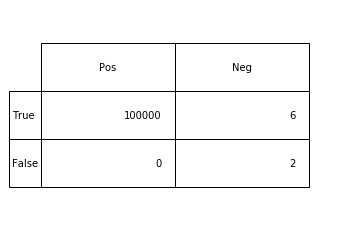

In [5]:
#Create a truth/false table with arrays created above, with the number of
#occurences of each type ommision and commision inserted into the table.

fig, ax = plt.subplots(1,1)
row_labels = ['True', 'False']
col_labels = ['Pos', 'Neg']
tableVals = [[len(corrGood), len(corrBad)], [len(wrongGood), len(wrongBad)]]

table = plt.table(cellText = tableVals,
                colWidths = [0.1]*3,
                 rowLabels = row_labels,
                 colLabels = col_labels,
                 loc = 'center')
table.scale(4,4)
ax.axis('off')

Part B
The number of known good data that is ommited is 0 when we set the statistical threshold to be 5-sigma. With a threshold of 5-sigma, we would be including 99.999...% of the data and ommiting data points that are furthest from the mean (1 point for every ~1.74 million points). If our threshold was less than 5-sigma, then we would ommit datapoints that are closer and closer to the mean. 

For our case above, with a 5-sigma statistical threshold, it is predictable to ommit 0 (or very close 0) datapoints.

Part C
We have included 2 bad datapoints into our good data after filtering out our dataset. The two points that were included were 10.3 and 12.7. Including these bad datapoints is unavoidable since they are within a significance of 5-sigma from the mean. Although we could reduce our statistical threshold to a lower sigma value, this can also mean that we remove significantly more good data just to remove 2 bad datpoints. 

# Problem 2

#Use rayleigh distribution, perfect for this problem
1) 

Part A
We observe the alignment of stars on subsequent images, which is a 2D Gaussian distribution with 1 arcsecond RMS. How far from the mean is a 5-sigma detection in arcseconds?

Part B
Since the background distribution is a 2D Gaussian, we will want to use a Rayleigh distribution as our probability distribution function. Distribute the data as a Rayleigh distribution, and by using a cdf, search for at what distance a 5-sigma detection would occur.

# Problem 3

A moon sized patch on the sky has a cosmic ray rate of 1 cosmic ray per minute. If we observe the where the moon is for 8 hours per night for 15 days, we observe 6800 cosmic rays. What is the sigma value for our moon shadow detection?

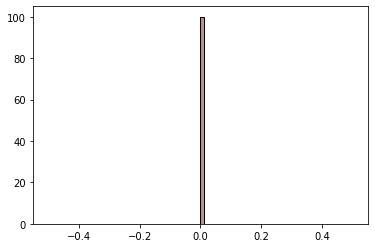

In [13]:
#poisson distribution
#k= number of occurences within interval
#mu = avg number of occurences within interval

x = np.arange(6000, 8400)
data = stats.poisson.pmf(x, 7200, loc=7200)
plot = plt.hist(data, bins=100, density=True, histtype='bar', ec='black',
         align='mid', color='rosybrown',
         label='Simulated data with bad plots')